In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
df=pd.read_csv('reviews.csv')
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,I love it. Easy to use. Make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,I love how I could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,Exactly what I needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [3]:
#1.convert the 'content' column to lower case
df['content'] = df['content'].str.lower()
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update! this app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible. there are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it. easy to use. make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [8]:
#2.to remove links using regular expressions
def remove_links(text):
    return re.sub(r'http\S+', '', text)

#apply the function to 'content' column
df['content'] = df['content'].apply(remove_links)

#will print only the content column
print(df['content'])


0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
                               ...                        
16782                                        excellent app
16783    i love it. easy to use. make my life organize....
16784    i love how i could make plans and check the ap...
16785                             exactly what i needed!!!
16786                                          very good 👍
Name: content, Length: 16787, dtype: object


In [9]:
#3.function to remove newline characters from the 'content' column
df['content'] = df['content'].str.replace('\n', '') 
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update! this app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible. there are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it. easy to use. make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [10]:
#4.function to remove words containing numbers using regular expressions
df['content'] = df['content'].apply(lambda x: ' '.join(word for word in str(x).split() if not re.match('.*\d.*', str(word))))
print(df)



                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleuserconten

In [11]:
#5.remove extra spaces from the 'content' column
df['content'] = df['content'].str.strip()
df

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update! this app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app is deceivingly terrible. there are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,i love it. easy to use. make my life organize....,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,i love how i could make plans and check the ap...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly what i needed!!!,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [12]:
#6.function to remove special characters using regular expression
content = df['content']
df['content'] = df['content'].str.replace(r'[^a-z\s]', '', regex=True)
#print modified content column
print(df['content'])


0        i have the same recurring tasks to do every da...
1        instead of shopping around i downloaded anydo ...
2        why does every once in a while out of the blue...
3        terrible update this app used to be perfect fo...
4        this app is deceivingly terrible there are som...
                               ...                        
16782                                        excellent app
16783    i love it easy to use make my life organize i ...
16784    i love how i could make plans and check the ap...
16785                                exactly what i needed
16786                                           very good 
Name: content, Length: 16787, dtype: object


In [13]:
#7.function for removal of stop words
nltk.download('stopwords')

#stopwords for the English language
stop_words = set(stopwords.words('english'))

#function to remove stop words from text
def remove_stopwords(text):
    #tokenize the text into words
    words = text.split()
    # to remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    #to join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

#apply the function to the 'content' column 
df['content'] = df['content'].apply(remove_stopwords)
df


[nltk_data] Downloading package stopwords to C:\Users\Moulya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recurring tasks every day need todolist remind...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shopping around downloaded anydo widel...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,every blue app asks update acct emails everyth...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible update app used perfect planning cert...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingly terrible really nice design fe...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easy use make life organize love way put ...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love could make plans check app almost everyda...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactly needed,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [15]:
#8.stemming by initializing porter stemmer
porter_stemmer = PorterStemmer()

#function to apply stemming to text
def apply_stemming(text):
    #tokenize the text into words
    words = text.split()
    #to apply stemming to each word
    stemmed_words = [porter_stemmer.stem(word) for word in words]
    #to join the stemmed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

#apply the function to the 'content' column
df['content'] = df['content'].apply(apply_stemming)
df


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi use make life organ love way put pho...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love could make plan check app almost everyday...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [19]:
#9.perform lemmatization by initializing the WordNet lemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

#function to apply lemmatization to text
def apply_lemmatization(text):
    #tokenize the text into words
    words = text.split()
    # Apply lemmatization to each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    #join the lemmatized words back into a sentence
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

#apply the function to the 'content' column
df['content'] = df['content'].apply(apply_lemmatization)
df



[nltk_data] Downloading package wordnet to C:\Users\Moulya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,excel app,0,6.1.4,05-07-2023 02:08,NaN,NaN,6.1.4,newest,com.appxy.planner
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,love easi use make life organ love way put pho...,9,6.1.4,29-06-2023 15:27,NaN,NaN,6.1.4,newest,com.appxy.planner
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,love could make plan check app almost everyday...,0,6.1.3,28-06-2023 01:04,NaN,NaN,6.1.3,newest,com.appxy.planner
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,exactli need,0,6.1.3,23-06-2023 13:14,NaN,NaN,6.1.3,newest,com.appxy.planner


In [31]:
!pip install matplotlib
!pip install wordcloud

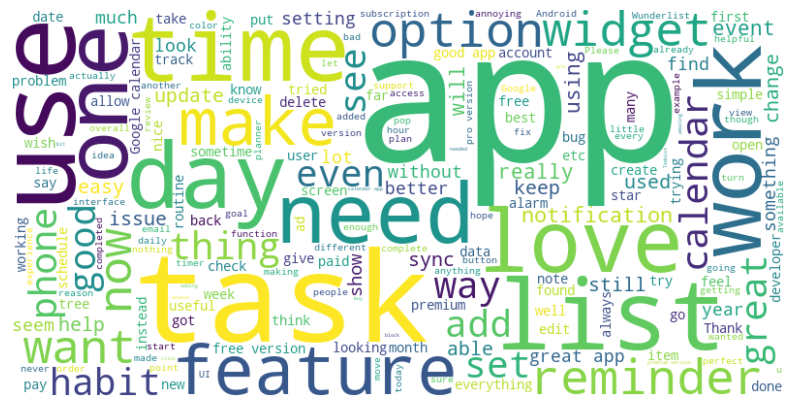

In [30]:
#10.wordcloud for text summarization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Extract text data from the 'content' column
text_data = ' '.join(df['content'].astype(str))

#Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

#Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
